In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
#https://www.kaggle.com/ruiqurm/lianjia
CSV_FILE_PATH = 'data/beijing_housing/new.csv'
beijing_housing = pd.read_csv(CSV_FILE_PATH, encoding='latin')

C:\Users\tdrumond\AppData\Local\Temp\ipykernel_10572\3597885828.py:3: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  beijing_housing = pd.read_csv(CSV_FILE_PATH, encoding='latin')


In [38]:
beijing_housing.dropna(axis=0, how='any', inplace=True)
beijing_housing.dropna(axis=1, how='all', inplace=True)

In [40]:
beijing_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159376 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  159376 non-null  object 
 1   id                   159376 non-null  object 
 2   Lng                  159376 non-null  float64
 3   Lat                  159376 non-null  float64
 4   Cid                  159376 non-null  int64  
 5   tradeTime            159376 non-null  object 
 6   DOM                  159376 non-null  float64
 7   followers            159376 non-null  int64  
 8   totalPrice           159376 non-null  float64
 9   price                159376 non-null  int64  
 10  square               159376 non-null  float64
 11  livingRoom           159376 non-null  object 
 12  drawingRoom          159376 non-null  object 
 13  kitchen              159376 non-null  int64  
 14  bathRoom             159376 non-null  object 
 15  floor            

In [41]:
beijing_housing.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [42]:
beijing_housing.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [43]:
feature_columns = [
    'Lng', 'Lat', 'square', 'kitchen', 'buildingType', 
    'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
    'fiveYearsProperty', 'subway', 'district', 'communityAverage']
target_column = ['price']
drop_columns = ['url', 'id', 'tradeTime', 'totalPrice', 'DOM', 'followers','livingRoom', 'drawingRoom', 'bathRoom', 'floor', 'constructionTime',]

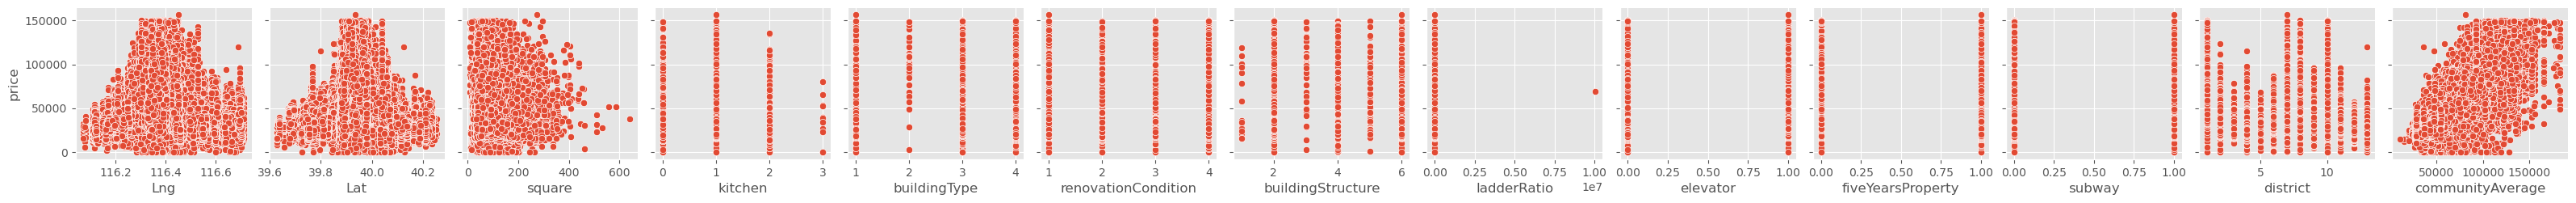

In [44]:
sns.pairplot(data=beijing_housing, 
            y_vars=target_column, x_vars=feature_columns
)

<AxesSubplot:xlabel='price'>

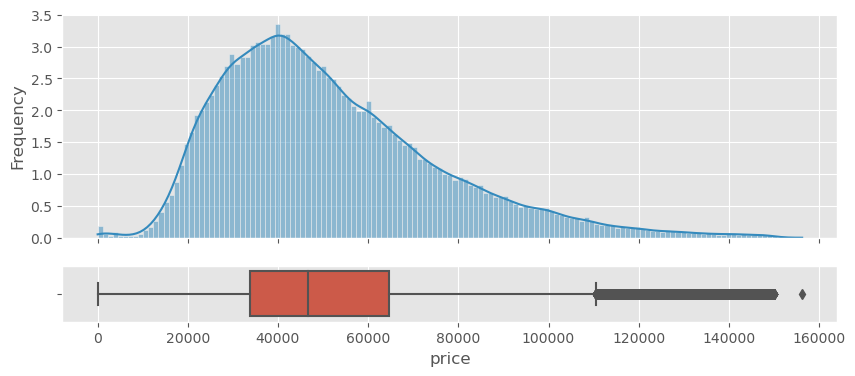

In [46]:
fig, axs = plt.subplots(
    2,1, figsize=(10, 4), sharex=True,
    gridspec_kw={'height_ratios': [0.8, 0.2]})

sns.histplot(data=beijing_housing, x='price', stat='proportion', kde=True, ax=axs[0])

sns.boxplot(data=beijing_housing, x='price', ax=axs[1])

## Simple outlier detection using 1.5 IQR


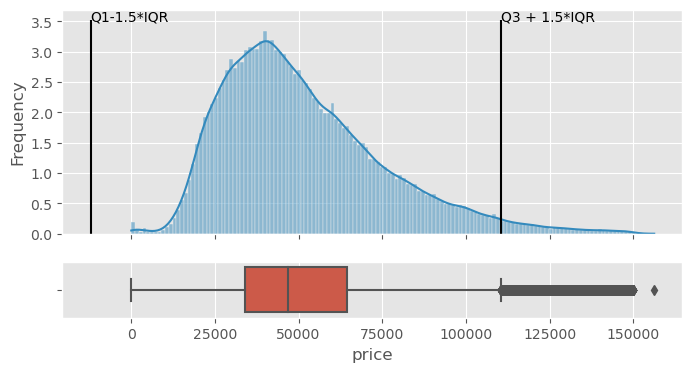

In [47]:
q1 = beijing_housing.price.quantile(0.25, interpolation='nearest')
q3 = beijing_housing.price.quantile(0.75, interpolation='nearest')
IQR = q3-q1
k = 1.5
lower, upper = q1-k*IQR, q3+k*IQR


fig, axs = plt.subplots(
    2,1, figsize=(8, 4),
    gridspec_kw={'height_ratios': [0.8, 0.2]}, sharex=True)
sns.histplot(beijing_housing.price, kde=True, stat='proportion', ax=axs[0])

plt.sca(axs[0])
bottom, top = plt.gca().get_ylim()
plt.vlines([lower, upper], bottom, top, colors='k')
plt.annotate(f'Q1-{k}*IQR',(lower,top))
plt.annotate(f'Q3 + {k}*IQR',(upper,top))

plt.sca(axs[1])
sns.boxplot(x=beijing_housing.price);

## Simple outlier detection using percentile threholds

### Remove top and bottom 5%

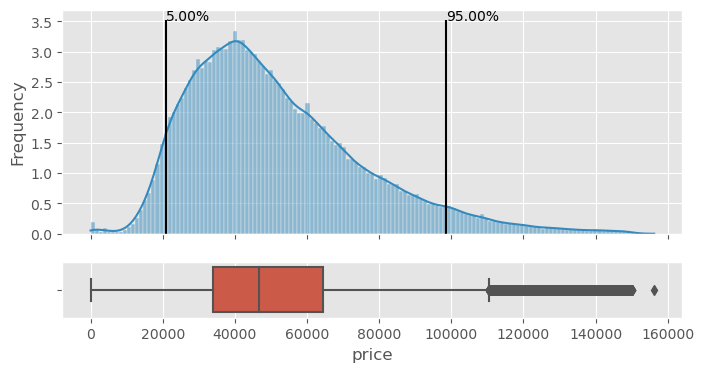

In [48]:
lim = 0.05
lower = beijing_housing.price.quantile(lim, interpolation='nearest')
upper = beijing_housing.price.quantile(1-lim, interpolation='nearest')

fig, axs = plt.subplots(
    2,1, figsize=(8, 4),
    gridspec_kw={'height_ratios': [0.8, 0.2]}, sharex=True)
sns.histplot(beijing_housing.price, kde=True, stat='proportion', ax=axs[0])

plt.sca(axs[0])
bottom, top = plt.gca().get_ylim()
plt.vlines([lower, upper], bottom, top, colors='k')
plt.annotate(f'{lim*100:0.2f}%',(lower,top))
plt.annotate(f'{(1-lim)*100:0.2f}%',(upper,top))

plt.sca(axs[1])
sns.boxplot(x=beijing_housing.price);

### Remove top and bottom 2.5%

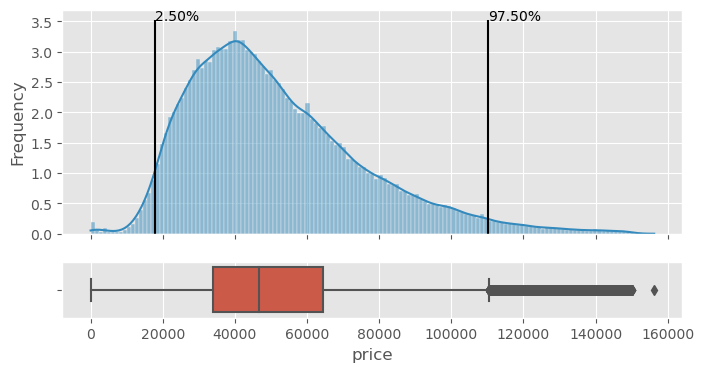

In [49]:
lim = 0.025
lower = beijing_housing.price.quantile(lim, interpolation='nearest')
upper = beijing_housing.price.quantile(1-lim, interpolation='nearest')

fig, axs = plt.subplots(
    2,1, figsize=(8, 4),
    gridspec_kw={'height_ratios': [0.8, 0.2]}, sharex=True)
sns.histplot(beijing_housing.price, kde=True, stat='proportion', ax=axs[0])

plt.sca(axs[0])
bottom, top = plt.gca().get_ylim()
plt.vlines([lower, upper], bottom, top, colors='k')
plt.annotate(f'{lim*100:0.2f}%',(lower,top))
plt.annotate(f'{(1-lim)*100:0.2f}%',(upper,top))

plt.sca(axs[1])
sns.boxplot(x=beijing_housing.price);

### Remove top and bottom 0.5%

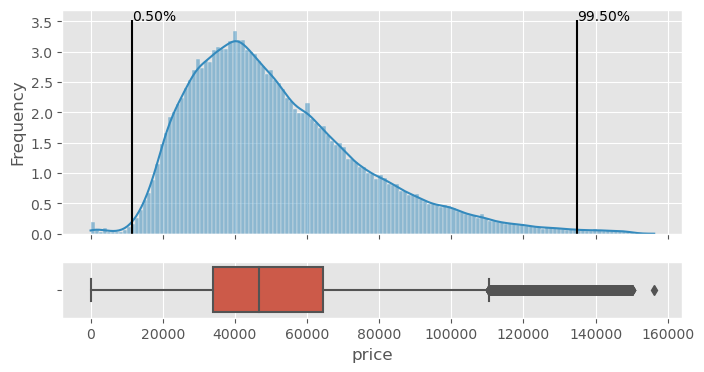

In [50]:
lim = 0.005
lower = beijing_housing.price.quantile(lim, interpolation='nearest')
upper = beijing_housing.price.quantile(1-lim, interpolation='nearest')

fig, axs = plt.subplots(
    2,1, figsize=(8, 4),
    gridspec_kw={'height_ratios': [0.8, 0.2]}, sharex=True)
sns.histplot(beijing_housing.price, kde=True, stat='proportion', ax=axs[0])

plt.sca(axs[0])
bottom, top = plt.gca().get_ylim()
plt.vlines([lower, upper], bottom, top, colors='k')
plt.annotate(f'{lim*100:0.2f}%',(lower,top))
plt.annotate(f'{(1-lim)*100:0.2f}%',(upper,top))

plt.sca(axs[1])
sns.boxplot(x=beijing_housing.price);

# Isolation forest

In [72]:
from sklearn.ensemble import IsolationForest
X = beijing_housing.dropna(axis=0,how='any').filter(feature_columns)
y = beijing_housing.dropna(axis=0,how='any').price
iforest = IsolationForest(random_state=42, contamination=0.01)
outlier_score = iforest.fit_predict(beijing_housing.filter(feature_columns), beijing_housing.price)

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:ylabel='Proportion'>

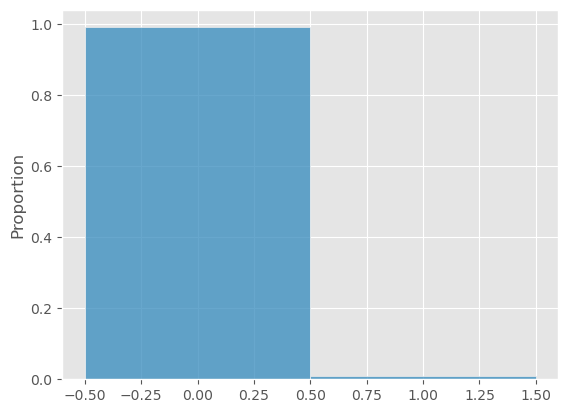

In [75]:
is_outlier = (1-(outlier_score+1)/2).astype(bool)
sns.histplot(is_outlier, discrete=True, stat='proportion')

### Check all districts remain well represented

In [85]:
pd.crosstab(beijing_housing['district'],
            pd.Series(~is_outlier, name='to_keep'),
            normalize='index')

to_keep,False,True
district,,
1,0.011859,0.988141
2,0.012895,0.987105
3,0.012249,0.987751
4,0.009447,0.990553
5,0.008469,0.991531
6,0.008002,0.991998
7,0.011136,0.988864
8,0.011351,0.988649
9,0.010023,0.989977


<AxesSubplot:xlabel='price', ylabel='Proportion'>

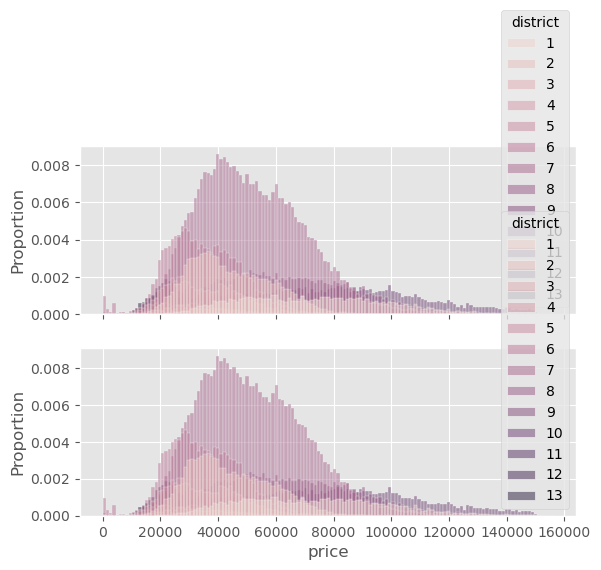

In [90]:
fig, axs = plt.subplots(2,1, sharex=True)
plt.sca(axs[0])
sns.histplot(data=beijing_housing, x='price', hue='district', stat='proportion')
plt.sca(axs[1])
sns.histplot(data=beijing_housing.loc[~is_outlier,:],
             x='price', hue='district',stat='proportion')